<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


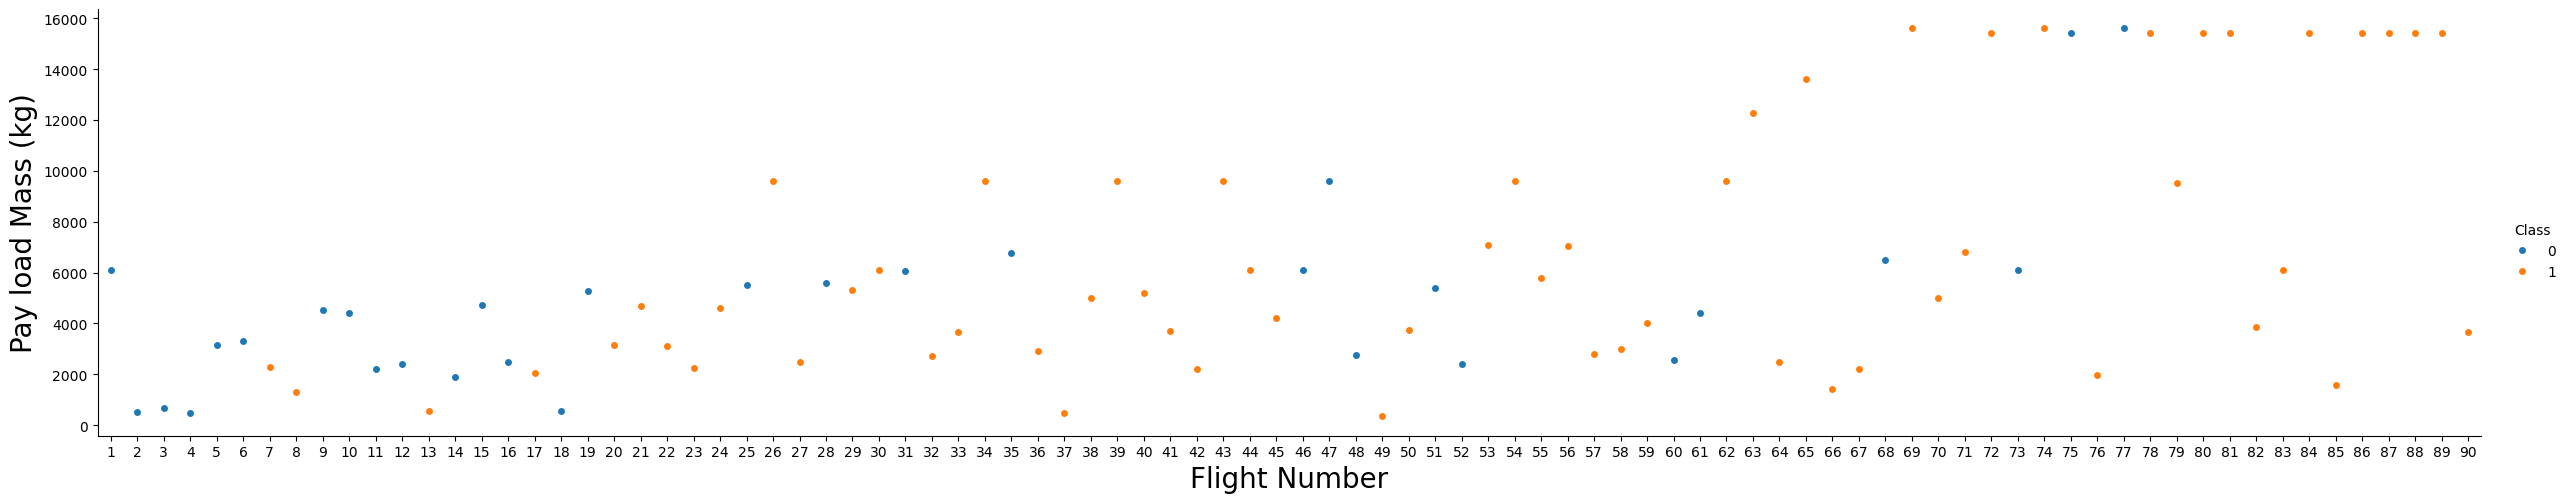

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class']


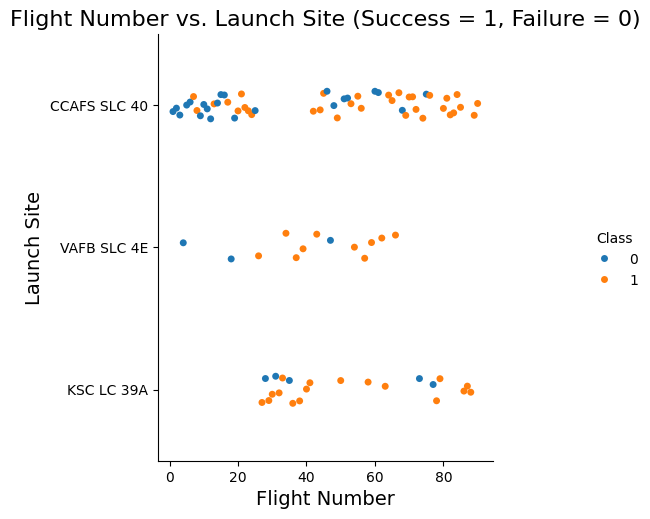

In [7]:
print(df.columns.tolist())
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    data=df,
    kind="strip",   # or "swarm" for non‑overlapping points
    aspect=1
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs. Launch Site (Success = 1, Failure = 0)", fontsize=16)
plt.show()



Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.
This chart shows every Falcon 9 first-stage landing attempt, plotted by its cumulative Flight Number on the x-axis and by Launch Site on the y-axis, with color indicating landing outcome (orange = success, blue = failure). Across CCAFS SLC 40, VAFB SLC 4E, and KSC LC 39A, the ratio of orange points to blue points grows as Flight Number increases. In early flights you see a roughly even mix of successes and failures; by the high-numbers (60+), nearly every attempt is orange. This reflects SpaceX’s learning curve: as they rack up more flights, recovery procedures and hardware mature and landing reliability climbs.All three pads follow the same story: more experience → higher landing success. Differences in the exact flight-number range per site simply reflect when each pad came online, but by capitalizing on early lessons (especially at CCAFS), SpaceX accelerated its reliability curve everywhere.

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


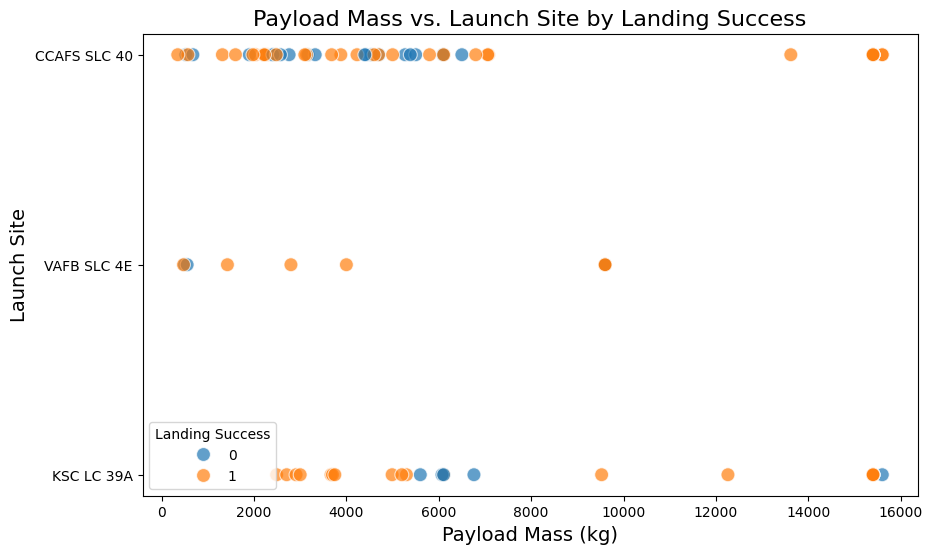

In [8]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    data=df,
    s=100,             # point size
    alpha=0.7          # transparency to help with overplotting
)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs. Launch Site by Landing Success", fontsize=16)
plt.legend(title="Landing Success")
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).
VAFB SLC 4E (middle row) only carries rockets up to about 8 000 kg.
CCAFS SLC 40 (top row) and KSC LC 39A (bottom row) both span the full mass range—from light (< 1 000 kg) up to the heaviest lifts (15 000+ kg).
Because Vandenberg launches polar and sun-synchronous missions (which tend to be smaller), it never sees the very heavy GEO or GTO payloads that Florida pads handle.
At CCAFS and KSC, success rate (orange) remains high across almost the entire mass range—even the heaviest flights (> 12 000 kg) land successfully nearly every time.
A handful of blue dots at both CCAFS and KSC (especially in the 5 000–7 000 kg band) show that isolated failures still occur, but they’re rare. The plot confirms that VAFB never handles the > 10 000 kg missions (hence the blank stretch at the top of that row) and that landing success stays strong even as payload mass grows—once you’ve learned to land reliably, mass becomes far less of a barrier.


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


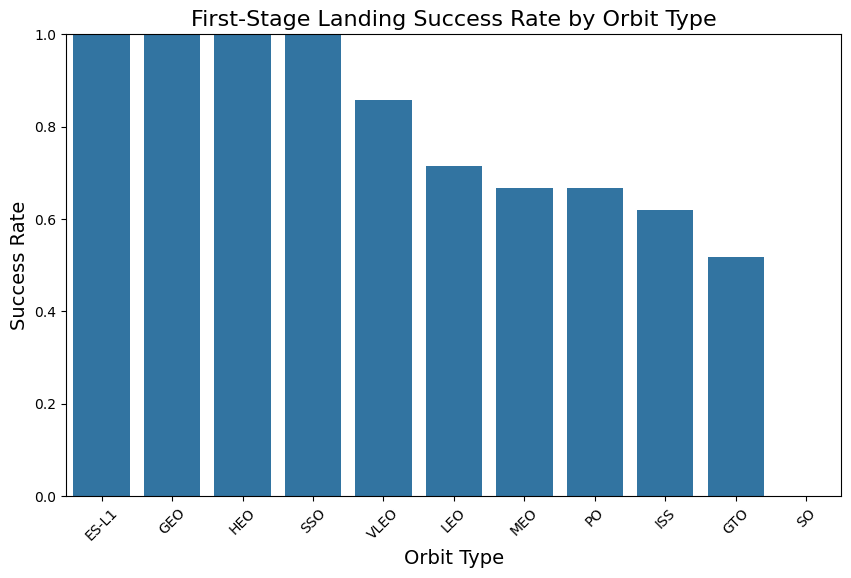

In [9]:
# HINT use groupby method on Orbit column and get the mean of Class column
# 1. Group and compute mean success rate
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

# 2. (Optional) Sort by success rate descending
orbit_success = orbit_success.sort_values(by='Class', ascending=False)

# 3. Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x='Orbit',
    y='Class',
    data=orbit_success,
    order=orbit_success['Orbit']  # preserves sorted order
)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.title('First‐Stage Landing Success Rate by Orbit Type', fontsize=16)
plt.ylim(0, 1)  # since it's a rate between 0 and 1
plt.xticks(rotation=45)
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.
From the bar chart, the perfect 100 % first-stage landing success rates occur for the following four orbit types: ES-L1 (Earth–Sun Lagrange-1 transfers), GEO (Geostationary transfer),
HEO (High-Earth orbits), SSO (Sun-synchronous orbits)
ES-L1, HEO, GEO, and SSO all show 100 % success, but those perfect bars mask small sample sizes:
ES-L1: only a couple of very recent test flights (e.g. missions toward the James Webb telescope)
HEO: typically a single or two demonstration missions
GEO: most are heavy, high-energy transfers, but SpaceX’s GEO success here reflects a handful of well-rehearsed commercial GTO launches
SSO: often lighter polar sats, simple mission profiles with plenty of propellant margin

The next-highest success rate is VLEO (~86 %), followed by LEO (~71 %), with the lowest being GTO (~52 %).
VLEO (Very Low Earth Orbit) comes next at ~86 %. These flights often involve experimental or demonstration satellites that allow extra fuel margin for landing.
LEO (~71 %) and MEO (~67 %) have more flights overall, so we’re seeing a more stabilized “true” success rate once volumes climb.



### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


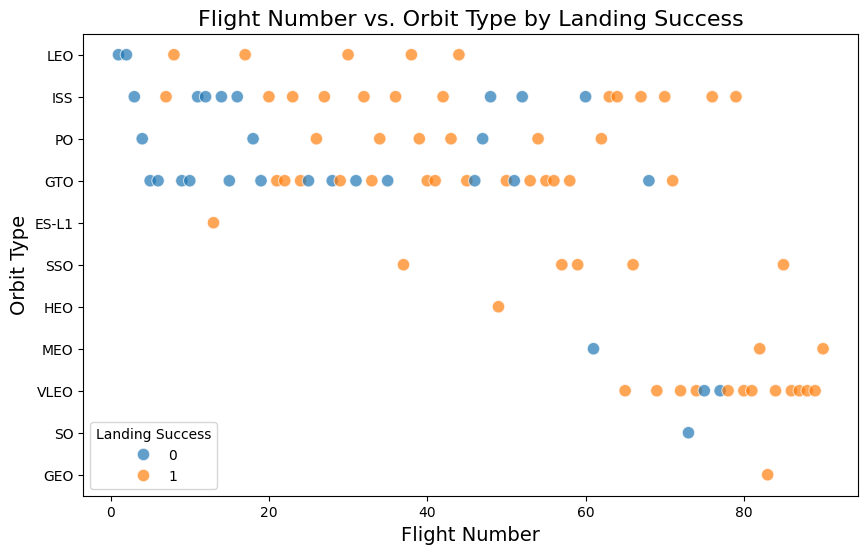

In [10]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    s=80,        # point size
    alpha=0.7    # transparency
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs. Orbit Type by Landing Success", fontsize=16)
plt.legend(title="Landing Success")
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.
Early LEO missions (Flight # < 20) show a mix of successes and failures.
After ~Flight # 20–30, almost every LEO launch is a success—blue points all but vanish.
This clear upward trend tells us that for LEO missions, SpaceX quickly dialed in a reliable landing profile: as the number of flights accrued, they nailed the boost-back and re-entry burns for low-energy orbits.

In GTO (Geostationary Transfer Orbit), you see failures and successes scattered across all flight numbers—even up into the 60s and 70s there are blue dots. There’s no obvious “crossover” point where failures stop occurring. Because GTO demands the highest delta-v, the booster often has the tightest propellant margin. Even with hundreds of flights—and all the lessons learned—some GTO missions still push the envelope enough to occasionally slip. ISS and PO (Polar Orbit) missions show something in between: a gradual improvement, but with stray failures even at high flight numbers—reflecting moderate energy requirements plus additional range-safety or trajectory constraints. VLEO, MEO, ES-L1, HEO, SSO, etc., have too few data points for a smooth curve, but generally cluster toward orange once flights exceed ~30–40.

Orbit-specific learning curves: Low-energy LEO missions quickly reach near-100 % reliability, while high-energy GTO remains the toughest profile, never fully escaping isolated failures no matter how many flights.

### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


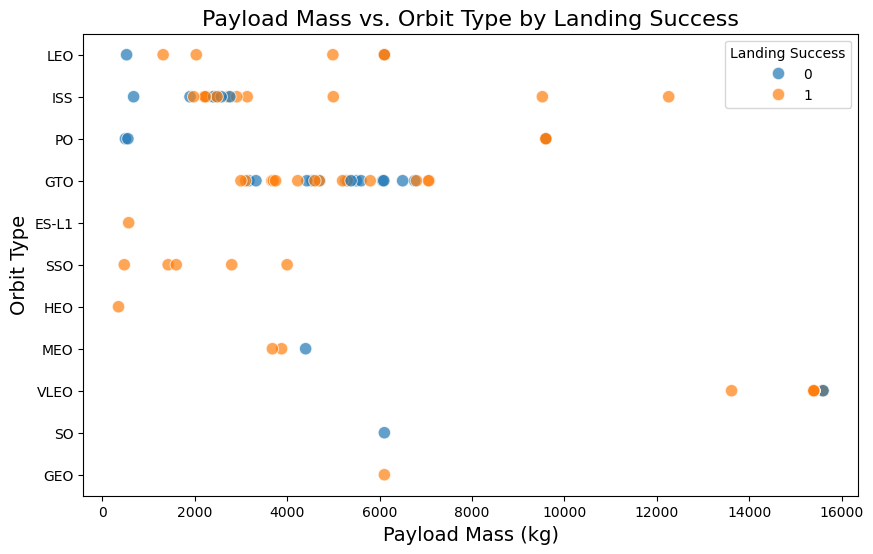

In [11]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    data=df,
    s=80,         # point size
    alpha=0.7     # transparency to see overplotting
)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs. Orbit Type by Landing Success", fontsize=16)
plt.legend(title="Landing Success")
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.
Polar (PO) has a handful of very heavy flights (∼10 000 kg+) and all of those points are orange.
LEO shows one or two launches in that “super-heavy” band, again all successful.
ISS likewise has a heavy-mass cluster (∼12 000 kg) with only orange points.
These orbits demand relatively lower Δv (especially ISS-resupply and low-inclination LEO), so even fully-loaded rockets retain enough propellant margin for a clean boost-back and landing burn.
GTO missions in the 6 000–10 000 kg range scatter both blue and orange. There’s no clear cutoff flight number beyond which GTO always succeeds.
You also see a heavy VLEO mission (~15 700 kg) with a mix of success and failure. Very Low Earth Orbit drops are rare high-throughput experiments, so VLEO can mirror GTO’s propellant-starved profile when the payload gets extreme.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


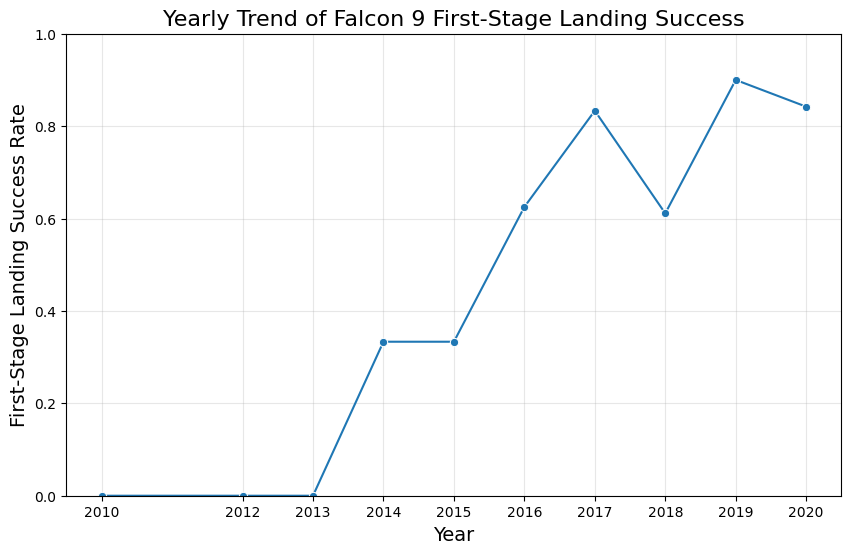

In [13]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# 1. Parse your Date column as datetime and extract Year
df['Date'] = pd.to_datetime(df['Date'])     # convert strings to Timestamps
df['Year'] = df['Date'].dt.year             # pull out the year into a new column

# 2. Compute average success rate per year
yearly_success = (
    df
    .groupby('Year')['Class']               # group by the Year column
    .mean()                                 # compute fraction of successes (Class=1)
    .reset_index(name='SuccessRate')        # tidy up with a column name
)

# 3. Plot the trend
plt.figure(figsize=(10,6))
sns.lineplot(
    data=yearly_success,
    x='Year',
    y='SuccessRate',
    marker='o',                              # circles at each year
)
plt.xlabel('Year', fontsize=14)
plt.ylabel('First-Stage Landing Success Rate', fontsize=14)
plt.title('Yearly Trend of Falcon 9 First-Stage Landing Success', fontsize=16)
plt.ylim(0, 1)
plt.xticks(yearly_success['Year'])           # ensure every year shows up on the axis
plt.grid(alpha=0.3)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020. In 2010–13, SpaceX was still in the very earliest test phases of booster recovery (mostly ocean splashdowns), so the recorded “success rate” for first-stage landings is 0 %. 2014–15 show the first handful of successful deck landings (∼33 % success). This reflects the transition from experimental tests (and some early failures) to repeatable landings on both ground pads and drone ships. Success jumps to ∼62 % in 2016 and ∼83 % in 2017 as SpaceX refines its grid-fin control, software, and landing-leg design. The drop back to ∼61 % in 2018 corresponds to a stretch of heavier GTO and high-inclination flights—missions that push the boost-back propellant to its limits, leading to a few isolated failures even on late-model boosters. 2019 hits a new high of ∼90 % as both hardware and operational procedures fully mature. 2020 dips marginally to ∼84 %, likely reflecting a small number of challenging or novel missions (and the statistical noise of fewer failures on fewer flights). Overall, the data paints a classic “S-curve” of technology maturation:

Phase 1 (2010–13): Proof-of-concept, many failures.

Phase 2 (2014–17): Accelerated learning and rapid improvement.

Phase 3 (2018–20+): High reliability (> 80 %), with only occasional setbacks on the most demanding flights.


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [15]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [16]:
# HINT: Use get_dummies() function on the categorical columns
# 1. Select your features
features = df[[
    'FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite',
    'Flights', 'GridFins', 'Reused', 'Legs',
    'LandingPad', 'Block', 'ReusedCount', 'Serial'
]]

# 2. One-hot encode the categorical columns in place
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    drop_first=False    # you can set True if you want k-1 encoding
)

# 3. Inspect the new feature set
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [17]:
# HINT: use astype function
# assuming you’ve already created features_one_hot
features_one_hot = features_one_hot.astype('float64')

# verify that all columns are now float64
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [19]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
